# Credit Card Fraud Detection

**Author:** [Syed Muhammad Ebad](https://www.kaggle.com/syedmuhammadebad)  
**Date:** 10-Nov-2024  
[Send me an email](mailto:mohammadebad1@hotmail.com)  
[Visit my GitHub profile](https://github.com/smebad)

## Introduction:
Credit card fraud detection is a critical issue that banks and financial institutions face. This project aims to create a model to identify fraudulent transactions accurately using the dataset available. Here, we’ll explore, preprocess, and model the data using a Logistic Regression model.

## Dataset Overview
The dataset contains transactions made by credit card in September 2013. It includes a Class column, where 1 represents fraud and 0 represents non-fraud. Our goal is to classify these transactions as fraud or non-fraud.


## 1. Importing Libraries

In [49]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')

## 2. Loading and Reviewing the Dataset

In [50]:
# Load the dataset
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [51]:
# information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [52]:
# statistical summary
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Observation:
* The Time and Amount features are continuous, while Class is binary.
* The dataset is highly imbalanced with very few fraud cases.

## 3. Exploratory Data Analysis (EDA)

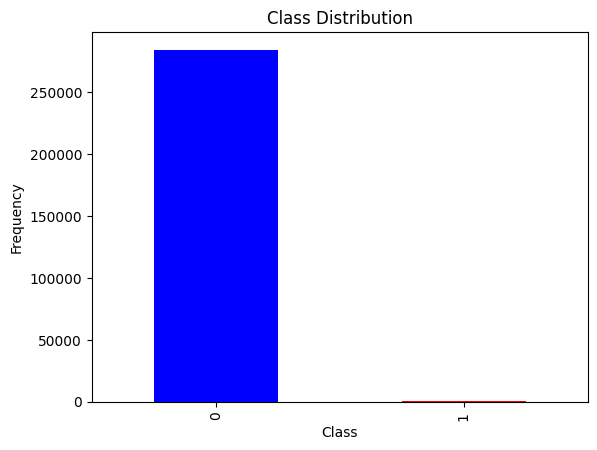

In [53]:
# Class distribution
df['Class'].value_counts().plot(kind='bar', color=['blue', 'red'])
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Class Distribution')
plt.show()

### Observation:
The dataset is imbalanced, with a significantly higher number of legitimate transactions than fraudulent ones.
* Class 0 = 284315
* Class 1 = 492

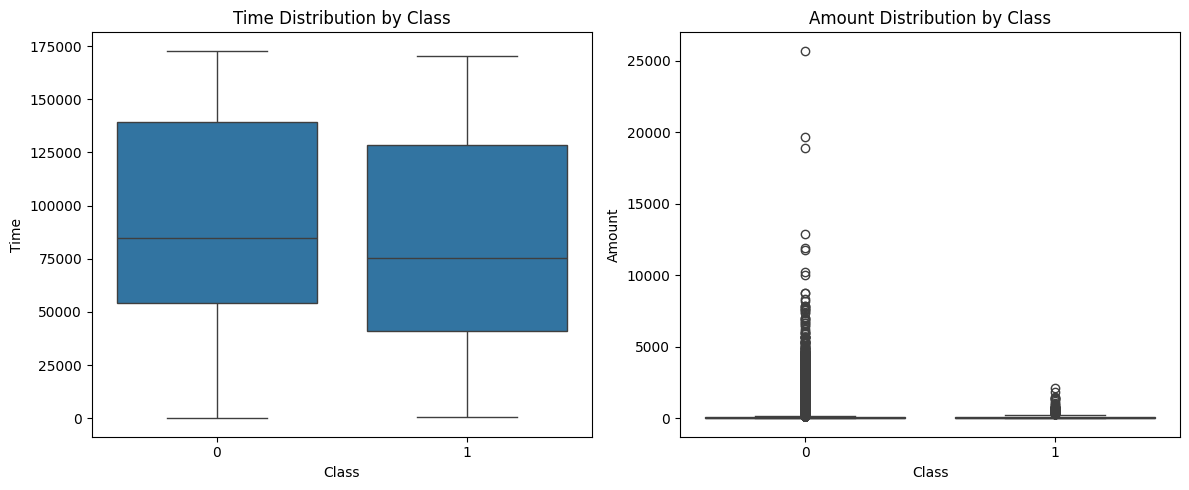

In [54]:
# Time and Amount Distribution by Class
plt.figure(figsize=(12, 5))

# Time vs Class
plt.subplot(1, 2, 1)
sns.boxplot(x='Class', y='Time', data=df)
plt.title('Time Distribution by Class')

# Amount vs Class
plt.subplot(1, 2, 2)
sns.boxplot(x='Class', y='Amount', data=df)
plt.title('Amount Distribution by Class')

plt.tight_layout()
plt.show()

### Observation:
* The distribution of Amount differs significantly between classes, with fraudulent transactions generally having lower amounts.

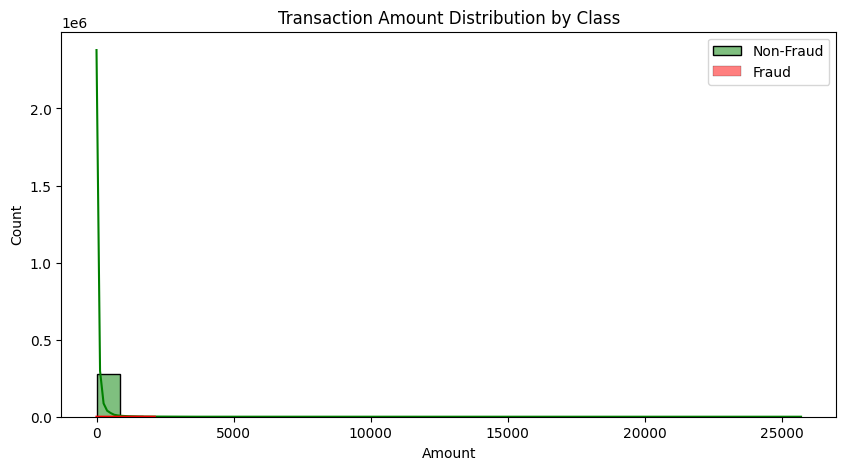

In [55]:
# Amount distribution for fraud and non fraud transactions
plt.figure(figsize=(10, 5))
sns.histplot(df[df['Class'] == 0]['Amount'], color='green', bins=30, label='Non-Fraud', kde=True)
sns.histplot(df[df['Class'] == 1]['Amount'], color='red', bins=30, label='Fraud', kde=True)
plt.legend()
plt.xlabel('Amount')
plt.title('Transaction Amount Distribution by Class')
plt.show()

### Observation:
* Fraudulent transactions tend to have lower amounts compared to non-fraudulent ones, potentially aiding in model differentiation.

## 4.Feature Correlations
* Analyzing feature correlations to see if there are any strong relationships with the Class.

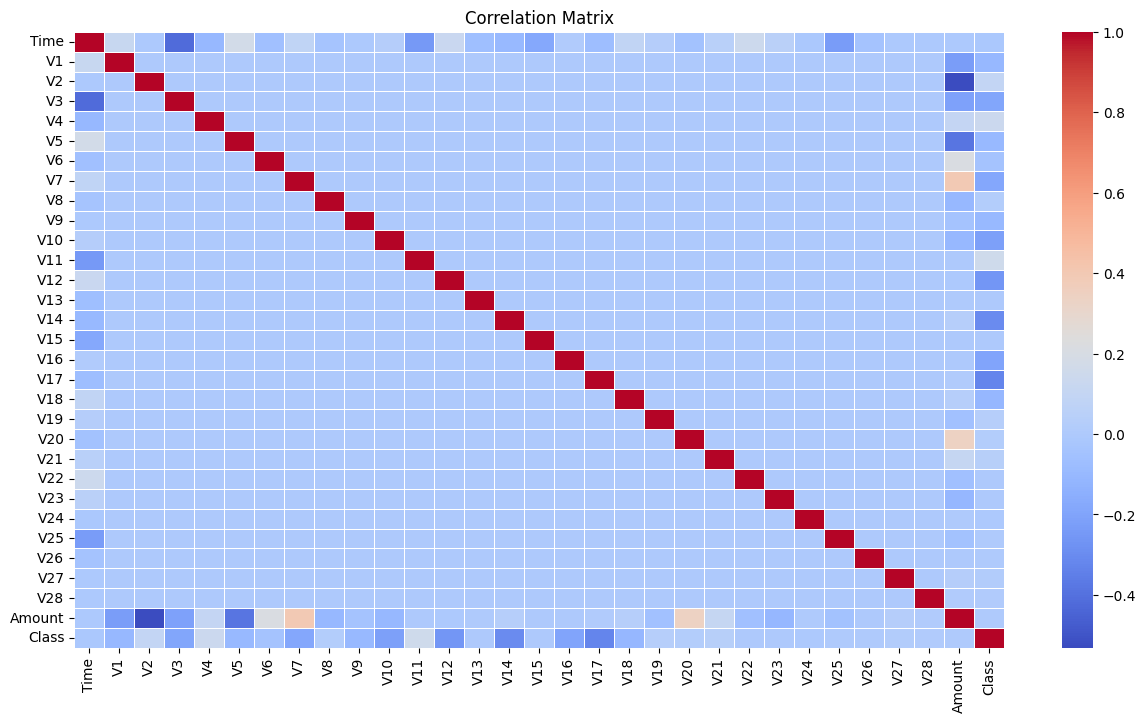

In [56]:
plt.figure(figsize=(15, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### Observation:
* Most features are independent, with few strong correlations, which is expected as many are principal components resulting from PCA.

## 5. Data Preprocessing
* Splitting the dataset into features (X) and target (y).
* Standardizing Amount for improved model performance.

In [57]:
X = df.drop('Class', axis=1)
y = df['Class']

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 6. Modeling and Evaluation
* Logistic Regression Model:
  * Using Logistic Regression due to its simplicity and interpretability in this binary classification task.

In [58]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Model Accuracy:", accuracy)

Logistic Regression Model Accuracy: 0.9986306660580738


### Observation:
* Logistic Regression achieved a reasonable accuracy given the imbalanced dataset.

### Confusion Matrix
Evaluating model predictions with a confusion matrix.

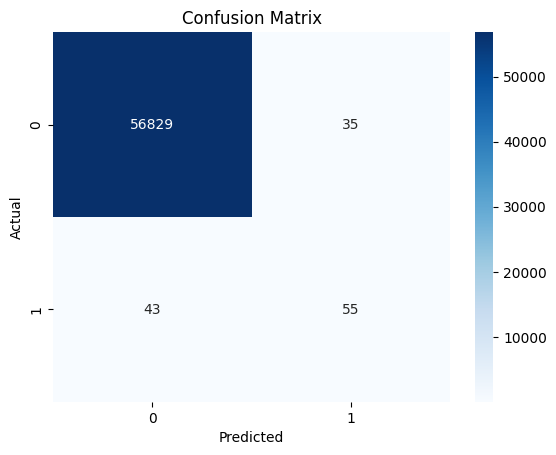

In [59]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### observation:
The model is successfully identifying most non-fraud cases, with some difficulty in detecting all fraud cases, likely due to the class imbalance.

## 7. Summary and Observations
In this notebook, we:
* Explored the highly imbalanced credit card fraud dataset.
* Visualized the distribution of transactions across various features.
* Built and evaluated a Logistic Regression model, which showed a fair accuracy but may need additional balancing techniques to improve fraud detection.